In [ ]:

from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**importing important libraries**

In [ ]:
#importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder

**loading the data set**

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/MachineLearning/ML Lab/dataset/train_data.csv')


**displaying the first 10 rows of the dataset**

In [ ]:

dft.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.0,0,V,N,O,R,520.0,1,2011.0,2,1224,0


**Getting  the  quick overview of the dataset**

In [ ]:
dft.shape

(7160, 14)

In [ ]:
len(dft)

7160

In [ ]:

#checking data types
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


**from the quick overview of our dataset,we have different types ie, 4 integers, 3 float, 7 object ou of the 14 columns**

**checking  for missing values  in the dataset**

In [ ]:
dft.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

**The data set has missing values in some of the columns and hence they need to be treated to improve model perfomance**

**lets see total sum of   missing values**

In [ ]:

dft.isnull().sum().sum()

723

**Having a total sum of 723 values has to be handled with carefully**

**checking the summary of statistics**

In [ ]:
dft.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [ ]:
dft.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [ ]:
#some columns dont make sense due to values they hold

In [ ]:
# Removing vague columns
columns_to_drop = ['Customer Id','NumberOfWindows','Geo_Code']
updated_dft= dft.drop(columns=columns_to_drop, axis=1)

In [ ]:
updated_dft.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim'],
      dtype='object')

In [ ]:
updated_dft.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,0


**filling missing values using mode for categorical values and median for continous values ,am using median since the values are skewed/not normally distributed**

In [ ]:
 #filling in missing values for categorical values
updated_dft['Garden'].fillna(dft['Garden'].mode()[0],inplace=True)


In [ ]:
# filling in missing values for Building Dimension and Building Dimension

updated_dft['Building Dimension'] = dft['Building Dimension'].fillna(updated_dft['Building Dimension'].median())
updated_dft['Date_of_Occupancy'] = dft['Date_of_Occupancy'].fillna(updated_dft['Date_of_Occupancy'].median())

In [ ]:
updated_dft.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Claim                 0
dtype: int64

**The dataset now has  no missing values ,good to go**

**Data analysis starts here**

In [ ]:
updated_dft.columns  #for displaying all our columns in the dataset

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim'],
      dtype='object')

In [ ]:
#distribution of the target varriable

In [ ]:
updated_dft['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

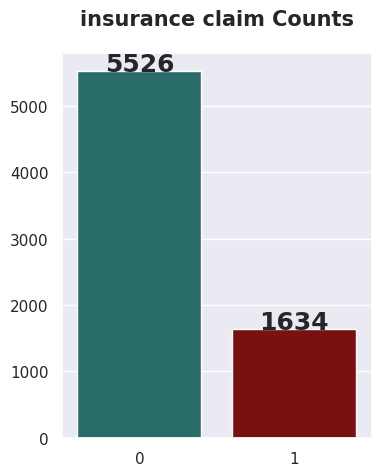

In [ ]:
# visualising  distribution for target variable
plt.figure(figsize=(4,5))
claim_rate =updated_dft["Claim"].value_counts()
sns.barplot(x=claim_rate.index,y=claim_rate.values,palette=["#1d7874","#8B0000"])
plt.title("insurance claim Counts",fontweight="black",size=15,pad=20)
for i, v in enumerate(claim_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)


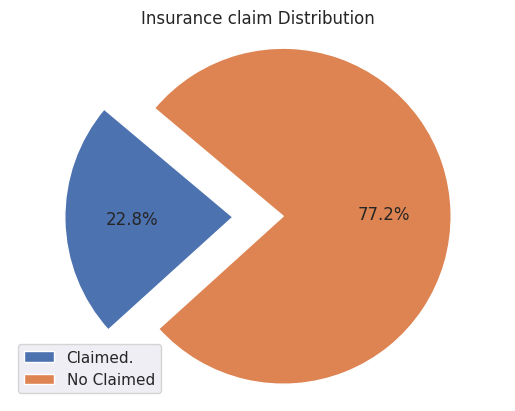

In [ ]:
# Sample data (replace with your actual data)
labels = ['Claimed.', 'No Claimed']
values = [updated_dft["Claim"].sum(), len(updated_dft) - updated_dft["Claim"].sum()]
# Create a pie chart with labeled segments
plt.pie(values, autopct='%1.1f%%', startangle=140,explode=[0.3,0])
plt.title("Insurance claim Distribution")

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.legend(labels=labels, loc='lower left')
plt.show()

**77.2% of customer did not issue and insurance claim 22.8% of customers issued an insuarance claim this shows that The target varriable is highly imbalanced with 0(no claims) much higher than the 1(atleast one claim over insured period ) meaning it will further require to be balanced using some machine learning aligorithms  **

**summarising the categorical varribles stats**

In [ ]:
updated_dft.describe(include='O' ).T

,count,unique,top,freq
Building_Painted,7160,2,V,5382
Building_Fenced,7160,2,N,3608
Garden,7160,2,O,3609
Settlement,7160,2,R,3610


**visualising the categorical values distribution**

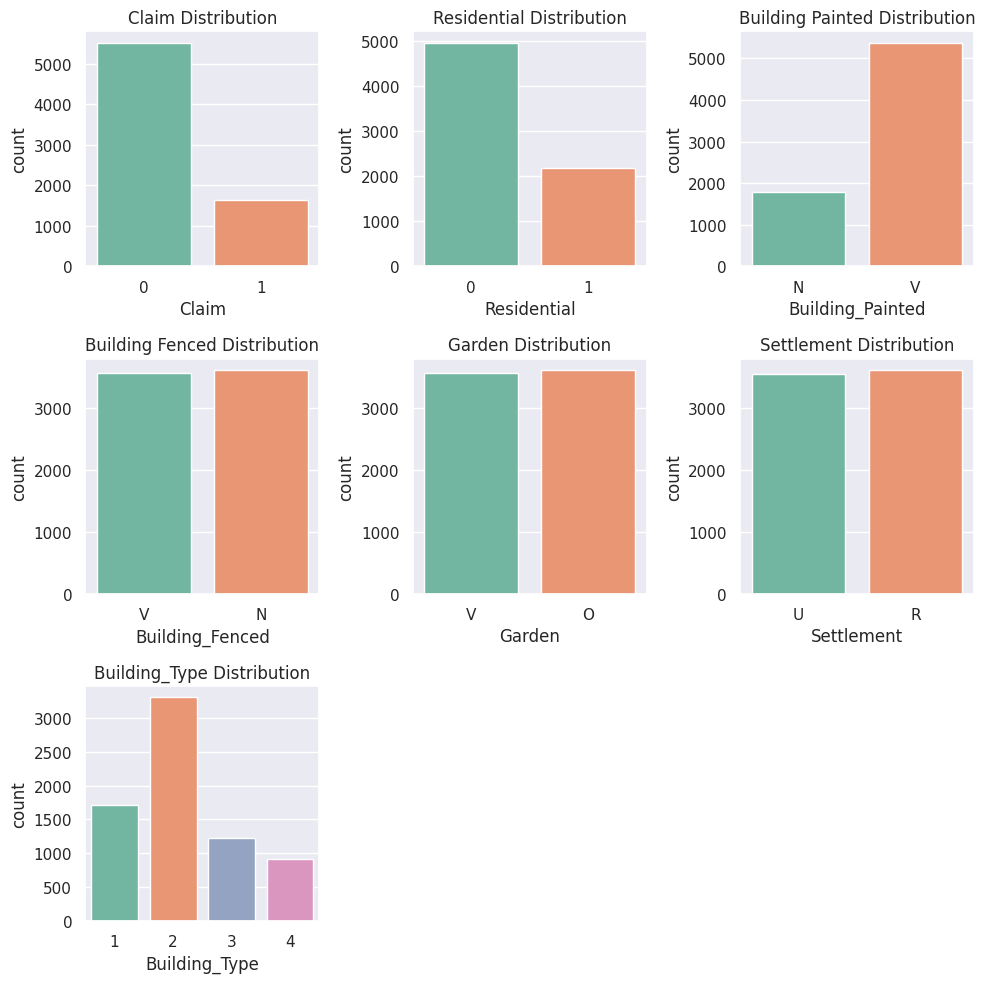

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.set_theme(style="darkgrid")
# Plot the Claim distribution
sns.countplot(data=updated_dft, x='Claim', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Claim Distribution')

# Plot the Residential distribution
sns.countplot(data=updated_dft, x='Residential', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Residential Distribution')


# Plot the Building Painted distribution
sns.countplot(data=updated_dft, x='Building_Painted', ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title('Building Painted Distribution')

# Plot the Building Fenced distribution
sns.countplot(data=updated_dft, x='Building_Fenced', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Building Fenced Distribution')

#Plot the Garden distribution
sns.countplot(data=updated_dft, x='Garden', ax=axes[1, 1],palette='Set2')
axes[1, 1].set_title('Garden Distribution')

# Plot the Settlement distribution
sns.countplot(data=updated_dft, x='Settlement', ax=axes[1, 2],palette='Set2')
axes[1, 2].set_title('Settlement Distribution')

#Plot the Building_Type distribution
sns.countplot(data=updated_dft, x='Building_Type', ax=axes[2, 0],palette='Set2')
axes[2, 0].set_title('Building_Type Distribution')


#Plot the Insured_Period distribution
#sns.countplot(data=df, x='Insured_Period', ax=axes[2, 1],palette='Set3')
#axes[2, 1].set_title('Insured_Period Distribution')

#Plot the Building_Type distribution
#sns.countplot(data=df, x='Building_Type', ax=axes[2, 1],palette='Set3')
#axes[2, 1].set_title('Building_Type Distribution')

fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**visualising the continous varriables**

In [ ]:
numerical_cont =['Building Dimension', 'Date_of_Occupancy']

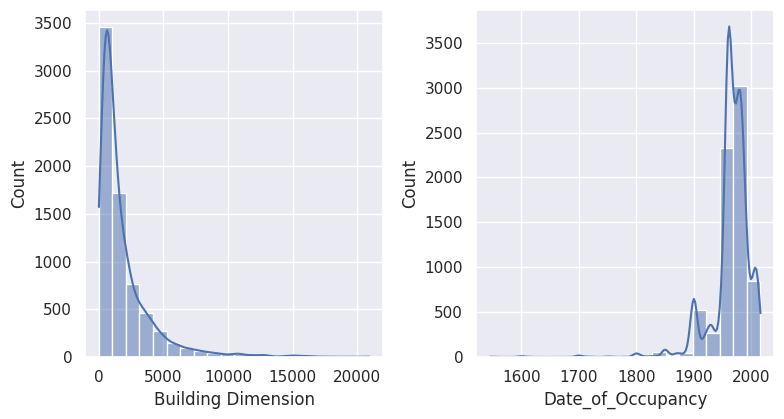

In [ ]:

plt.figure(figsize=(8, 8))
for i, column in enumerate(numerical_cont, 1):
    plt.subplot(2, 2, i)
    sns.histplot(updated_dft[column], bins=20, kde = True)
plt.tight_layout()
plt.show()

**There are outliers in Building dimension columns the fact its skewed to the left as well in the data_of_occupancy since its  right skewing**

**Visualising the relationship betweeen  categorical variables and claim**

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.set_theme(style="darkgrid")
# Plot the Claim distribution
sns.countplot(data=updated_dft, x='Claim', ax=axes[0, 0], hue = 'Claim', palette='Set2')
axes[0, 0].set_title('Claim Distribution')

# Plot the Residential distribution
sns.countplot(data=updated_dft, x='Residential', ax=axes[0, 1], hue = 'Claim',palette='Set2')
axes[0, 1].set_title('Residential Distribution')


# Plot the Building Painted distribution
sns.countplot(data=updated_dft, x='Building_Painted', ax=axes[0, 2], hue = 'Claim',palette='Set2')
axes[0, 2].set_title('Building Painted Distribution')
# Plot the Building Fenced distribution
sns.countplot(data=updated_dft, x='Building_Fenced', ax=axes[1, 0], hue = 'Claim',palette='Set2')
axes[1, 0].set_title('Building Fenced Distribution')

#Plot the Garden distribution
sns.countplot(data=updated_dft, x='Garden', ax=axes[1, 1], hue = 'Claim',palette='Set2')
axes[1, 1].set_title('Garden Distribution')

# Plot the Settlement distribution
sns.countplot(data=updated_dft, x='Settlement', ax=axes[1, 2], hue = 'Claim',palette='Set2')
axes[1, 2].set_title('Settlement Distribution')

#Plot the Building_Type distribution
sns.countplot(data=updated_dft, x='Building_Type', ax=axes[2, 0], hue = 'Claim',palette='Set2')
axes[2, 0].set_title('Building_Type Distribution')


#Plot the Insured_Period distribution
#sns.countplot(data=df, x='Insured_Period', ax=axes[2, 1],palette='Set3')
#axes[2, 1].set_title('Insured_Period Distribution')


fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observations**


*   The non painted buildings have a higher insurance claim campared to the houses for the first bar graphpainted



*   The non fenced buildings have a higher insurance claim campared to the fensed houses
*   The buildings without gardens a higher insurance claim campared to those buildings with gardens

*   Buildings in the Urban Settlement have a low insurance claim as compared to those in rural setting






.

**Detecting outliers in Buildingdemension **

In [ ]:
def plot_variable(updated_dft,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(updated_dft[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(updated_dft[variable])
  plt.title('A boxplot for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  plt.show()



In [ ]:
# visualizing outliers in Building dimension variable
plot_variable(updated_dft,'Building Dimension')

**Removing outliers**

In [ ]:

upper_limit = updated_dft['Building Dimension'].mean() + 2.5*updated_dft['Building Dimension'].std()
lower_limit = updated_dft['Building Dimension'].mean() - 2.5*updated_dft['Building Dimension'].std()

In [ ]:
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)
# lets find the outliers from that column
updated_dft.loc[(updated_dft['Building Dimension']>upper_limit) | (updated_dft['Building Dimension']<lower_limit)]

In [ ]:
# Now  trim the outliers from the Building Dimension variable
dfttrimmed = updated_dft.loc[(updated_dft['Building Dimension']<upper_limit) & (updated_dft['Building Dimension']>lower_limit)]
print('old dataframe:',len(updated_dft))
print('new dataframe:',len(dfttrimmed))
print('outliers:',len(updated_dft)-len(dfttrimmed))

**new visualisation of the building dimension varriable**

In [ ]:
def plot_variable(updated_dft,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(updated_dft[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(updated_dft[variable])
  plt.title('A boxplot for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  plt.show()

plot_variable(dfttrimmed ,'Building Dimension')

In [ ]:
# Visualisation of outliers in the date of occupancy variable
def plot_variable(updated_dft,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(updated_dft[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of date of occupancy')
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(updated_dft[variable])
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  plt.title('A boxplot for the distribution of date of occupancy')
  plt.show()

In [ ]:
plot_variable(updated_dft,'Date_of_Occupancy')

**visually there are otliers in date of occupancy**

In [ ]:
# using the Z score method to remove with outliers in  the Date_of_Occupancy variable
upper_limit = updated_dft['Date_of_Occupancy'].mean() + 2.5*updated_dft['Date_of_Occupancy'].std()
lower_limit = updated_dft['Date_of_Occupancy'].mean() - 2.5*updated_dft['Date_of_Occupancy'].std()

In [ ]:
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)

In [ ]:
# lets find the outliers from that column
updated_dft.loc[(updated_dft['Date_of_Occupancy']>upper_limit) | (updated_dft['Date_of_Occupancy']<lower_limit)]

In [ ]:
# we r going to trim the outliers
trimmedocc = updated_dft.loc[(updated_dft['Date_of_Occupancy']<upper_limit) & (updated_dft['Date_of_Occupancy']>lower_limit)]
print('old dataframe:',len(updated_dft))
print('new dataframe:',len(trimmedocc))
print('outliers:',len(updated_dft)-len(trimmedocc))

**visualisation of date of occupancy varriable after removing outliers**

In [ ]:
def plot_variable(updated_dft,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(updated_dft[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of date of occupancy')
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(updated_dft[variable])
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  plt.title('A boxplot for the distribution of date of occupancy')
  plt.show()

In [ ]:
plot_variable(trimmedocc,'Date_of_Occupancy')

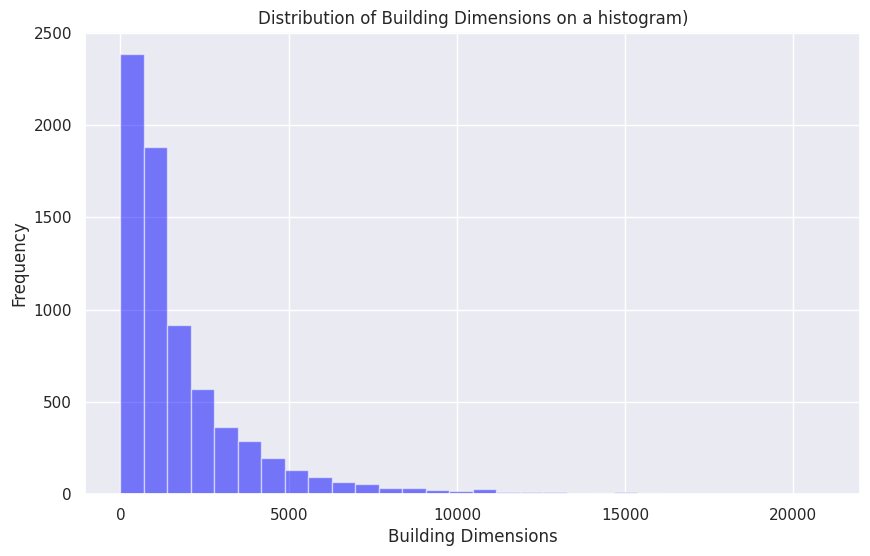

In [ ]:
# A histogram showing the distribution of Building dimensions
plt.figure(figsize = (10,6))
plt.hist(updated_dft["Building Dimension"], bins=30, color='blue', alpha=0.5)
plt.xlabel("Building Dimensions")
plt.ylabel("Frequency")
plt.title("Distribution of Building Dimensions on a histogram)")
plt.show()

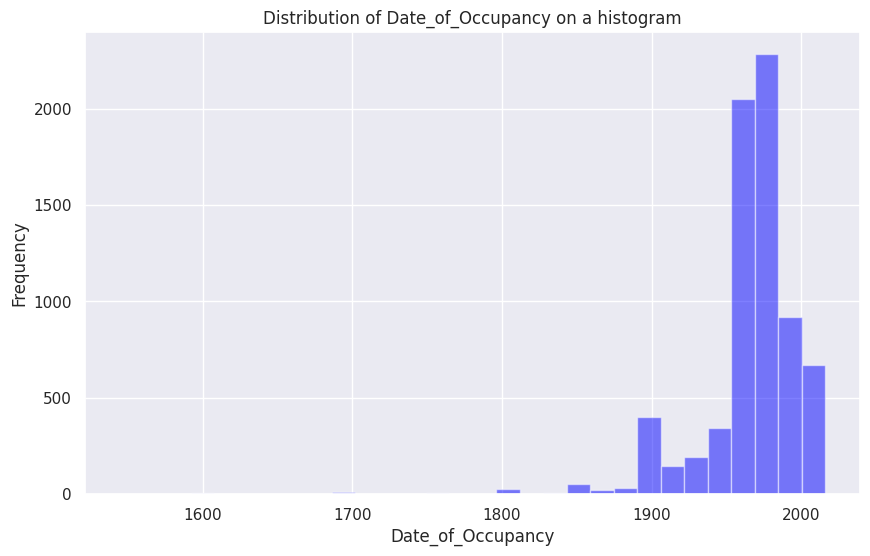

In [ ]:
# A histogram showing the distribution of Date_of_Occupancy
plt.figure(figsize = (10,6))
plt.hist(updated_dft["Date_of_Occupancy"], bins=30, color='blue', alpha=0.5)
plt.xlabel("Date_of_Occupancy")
plt.ylabel("Frequency")
plt.title("Distribution of Date_of_Occupancy on a histogram")
plt.show()

In [ ]:
#displaying all values in dateOfOcupancy varriable
updated_dft["Date_of_Occupancy"].unique()

array([1960., 1850., 1800., 1980., 1988., 2013., 2011., 1550., 1900.,
       2007., 1970., 1950., 1700., 1976., 1940., 1920., 1982., 1972.,
       2010., 1971., 1995., 2006., 1999., 1969., 1985., 1965., 1981.,
       1975., 1997., 2003., 1990., 1930., 1973., 1991., 1974., 1978.,
       1967., 1927., 1952., 1957., 2009., 1977., 1890., 1949., 1951.,
       2008., 1987., 2000., 1962., 1956., 1993., 1912., 1983., 1954.,
       1968., 2004., 1936., 1958., 1966., 1953., 1979., 1946., 1955.,
       2001., 1870., 1961., 2015., 1613., 1964., 1984., 2014., 2002.,
       1986., 1992., 2005., 2012., 1910., 1945., 1864., 1942., 1939.,
       1934., 1998., 1908., 1948., 1860., 1926., 1938., 1895., 1545.,
       1959., 1989., 1996., 1963., 1840., 2016., 1718., 1600., 1875.,
       1898., 1880., 1915., 1994., 1810., 1937., 1907., 1931., 1925.,
       1935., 1824., 1914., 1750., 1846., 1903., 1905., 1906., 1830.,
       1923., 1924., 1928., 1947., 1911., 1901., 1902., 1904., 1919.,
       1896., 1913.,

In [ ]:
updated_dft.shape

(7160, 11)

In [ ]:
#checking for duplicates
dft.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encoding the catedorical  variables
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ["Building_Painted", "Building_Fenced", "Garden", "Settlement",]
for column in categorical_columns:
    updated_dft[column] = label_encoder.fit_transform(updated_dft[column])
    print(updated_dft)

      YearOfObservation  Insured_Period  Residential  Building_Painted  \
0                  2013        1.000000            0                 0   
1                  2015        1.000000            0                 1   
2                  2014        1.000000            0                 0   
3                  2013        1.000000            0                 1   
4                  2014        1.000000            0                 1   
...                 ...             ...          ...               ...   
7155               2012        1.000000            1                 1   
7156               2013        1.000000            0                 1   
7157               2016        0.038251            0                 1   
7158               2013        1.000000            0                 1   
7159               2014        1.000000            0                 1   

      Building_Fenced  Garden  Settlement  Building Dimension  Building_Type  \
0                   1       1  

**feature selection (selecting the best features for the model)**

In [ ]:
#Getting the target feature(claim) and storing it in a, and the rest of the features in b
a = updated_dft.drop(columns=['Claim'])  # Features
b = updated_dft['Claim']  # Target variable

In [ ]:
#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(a, b)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(a, b)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

feature_scores = pd.DataFrame({'Feature': a.columns, 'Combined_Score': combined_scores})
feature_scores = feature_scores.sort_values(by='Combined_Score', ascending=False)
feature_scores

,Feature,Combined_Score
7,Building Dimension,1.712051e+06
8,Building_Type,1.276625e+02
1,Insured_Period,6.034230e+01
2,Residential,4.904605e+01
5,Garden,2.935881e+01
6,Settlement,2.919064e+01
4,Building_Fenced,2.877967e+01
3,Building_Painted,7.971521e+00
9,Date_of_Occupancy,3.653432e+00
0,YearOfObservation,1.919750e+00


In [ ]:
feature_scores

,Feature,Combined_Score
7,Building Dimension,1.712051e+06
8,Building_Type,1.276625e+02
1,Insured_Period,6.034230e+01
2,Residential,4.904605e+01
5,Garden,2.935881e+01
6,Settlement,2.919064e+01
4,Building_Fenced,2.877967e+01
3,Building_Painted,7.971521e+00
9,Date_of_Occupancy,3.653432e+00
0,YearOfObservation,1.919750e+00


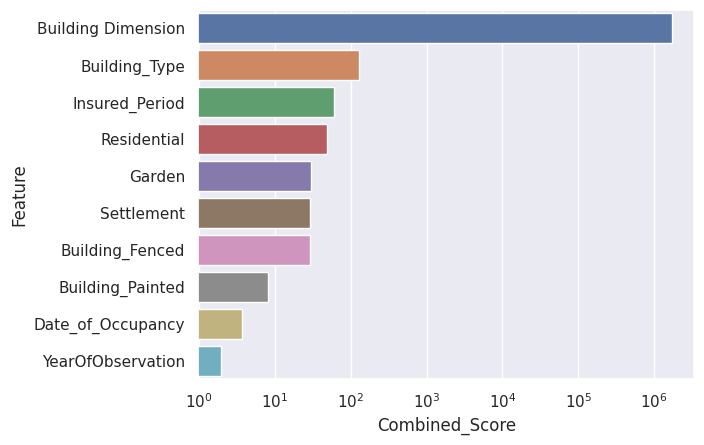

In [ ]:
sns.barplot(feature_scores, y ='Feature', x ='Combined_Score')
plt.xscale('log')

**loading the test dataset**

In [ ]:
dftest = pd.read_csv('/content/drive/MyDrive/MachineLearning/ML Lab/dataset/test_data.csv')
dftest.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [ ]:
dftest.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [ ]:
dftest['Geo_Code'] = dftest['Geo_Code'].fillna(dftest['Geo_Code'].mode()[0])

In [ ]:
dftest['Garden']= dftest['Garden'].fillna(dftest['Garden'].mode()[0])

In [ ]:
#Distribution of data is skewed hence we use median
dftest['Building Dimension'] = dftest['Building Dimension'].fillna(dftest['Building Dimension'].median())

In [ ]:
dftest.drop(columns=['NumberOfWindows'],inplace=True)

In [ ]:
dftest['Date_of_Occupancy'] = dftest['Date_of_Occupancy'].fillna(dftest['Date_of_Occupancy'].median())

In [ ]:
dftest.drop(columns=['Customer Id'], inplace = True)

In [ ]:
dftest.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code
0,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3310
1,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3310
2,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,3310
3,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3321
4,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3321


In [ ]:
dftest['Building_Painted'] = dftest['Building_Painted'].replace({'V':0, 'N':1})

dftest['Building_Fenced']= dftest['Building_Fenced'].replace({'V':0, 'N':1})

dftest['Garden']= dftest['Garden'].replace({'O':0, 'V':1})

dftest['Settlement']= dftest['Settlement'].replace({'R':0, 'U':1})

dftest['Building_Type']= dftest['Building_Type'].replace({'1':0, '2':1, '3':2, '4':3})

In [ ]:
dftest.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code
0,2013,1.000000,0,0,1,0,0,300.0,1,1960.0,3310
1,2016,0.997268,0,0,1,0,0,300.0,1,1960.0,3310
2,2013,0.369863,0,0,0,1,1,790.0,1,1960.0,3310
3,2014,1.000000,0,0,1,0,0,1405.0,1,2004.0,3321
4,2016,1.000000,0,0,1,0,0,1405.0,1,2004.0,3321


In [ ]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   3069 non-null   int64  
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   int64  
 4   Building_Fenced     3069 non-null   int64  
 5   Garden              3069 non-null   int64  
 6   Settlement          3069 non-null   int64  
 7   Building Dimension  3069 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   Date_of_Occupancy   3069 non-null   float64
 10  Geo_Code            3069 non-null   object 
dtypes: float64(3), int64(7), object(1)
memory usage: 263.9+ KB


In [ ]:
dftest = dftest.drop(dftest[dftest.Geo_Code.str.contains(r'[A-Z]')].index)
dftest['Geo_Code'] = pd.to_numeric(dftest['Geo_Code'])

In [ ]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 3068
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   2929 non-null   int64  
 1   Insured_Period      2929 non-null   float64
 2   Residential         2929 non-null   int64  
 3   Building_Painted    2929 non-null   int64  
 4   Building_Fenced     2929 non-null   int64  
 5   Garden              2929 non-null   int64  
 6   Settlement          2929 non-null   int64  
 7   Building Dimension  2929 non-null   float64
 8   Building_Type       2929 non-null   int64  
 9   Date_of_Occupancy   2929 non-null   float64
 10  Geo_Code            2929 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 274.6 KB


In [ ]:
X_test = dftest.copy()

In [ ]:
X_test.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code
0,2013,1.000000,0,0,1,0,0,300.0,1,1960.0,3310
1,2016,0.997268,0,0,1,0,0,300.0,1,1960.0,3310
2,2013,0.369863,0,0,0,1,1,790.0,1,1960.0,3310
3,2014,1.000000,0,0,1,0,0,1405.0,1,2004.0,3321
4,2016,1.000000,0,0,1,0,0,1405.0,1,2004.0,3321


**model building**

In [ ]:
x = updated_dft.drop(columns=['Claim'])  # Features
y = updated_dft['Claim']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size= 0.2, random_state =0)

In [ ]:
pd.set_option('display.max_columns',None)
X_train.head()


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
3783,2012,1.000000,0,1,1,1,1,1220.0,2,1980.0
2460,2015,1.000000,0,1,0,0,0,760.0,2,1600.0
6207,2015,1.000000,1,0,1,1,1,180.0,1,1960.0
1551,2014,1.000000,0,1,1,1,1,1726.0,2,1980.0
2190,2016,0.997268,1,1,0,0,0,2125.0,2,1920.0


In [ ]:
X_train.shape

(5728, 10)

In [ ]:
X_train['Building Dimension']

3783     1220.0
2460      760.0
6207      180.0
1551     1726.0
2190     2125.0
         ...   
4931      982.0
3264     4500.0
1653     2316.0
2607    14472.0
2732     1195.0
Name: Building Dimension, Length: 5728, dtype: float64

**scaling **

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['YearOfObservation','Building Dimension', 'Date_of_Occupancy']
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])

In [ ]:
X_train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
3783,-1.208407,1.000000,0,1,1,1,1,-0.288729,2,0.438823
2460,0.958027,1.000000,0,1,0,0,0,-0.491330,2,-10.629341
6207,0.958027,1.000000,1,0,1,1,1,-0.746782,1,-0.143712
1551,0.235882,1.000000,0,1,1,1,1,-0.065869,2,0.438823
2190,1.680171,0.997268,1,1,0,0,0,0.109865,2,-1.308782


**building svm**

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)
#acc_svc = (svm_classifier.score(X_train, y_train))
#acc_svc

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svm_classifier.predict(X_test)
y_pred.shape

ValueError: ignored